In [ ]:
9. 분류분석 입문¶
05.01 분류용 예제 데이터
05.02 분류용 가상 데이터 생성
05.03 분류모형
05.04 분류 성능평가
10. 로지스틱 회귀분석¶
06.01 로지스틱 회귀분석
11. 나이브베이즈¶
07.01 선형판별분석법과 이차판별분석법
07.02 나이브베이즈 분류모형
07.03 감성 분석
12. 의사결정나무와 모형결합¶
08.01 의사결정나무
09.01 모형 결합
09.02 부스팅 방법
13. 퍼셉트론과 서포트벡터머신¶
10.01 퍼셉트론
10.02 서포트 벡터 머신
11.01 커널 서포트 벡터 머신

In [10]:
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
sp = pd.Series(iris.target, dtype = "category")
sp

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [26]:
sp = sp.cat.rename_categories(iris.target_names)
sp

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): [setosa, versicolor, virginica]

In [28]:
# df_merged = df.concat(sp) # wrong !
df['species'] = sp
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


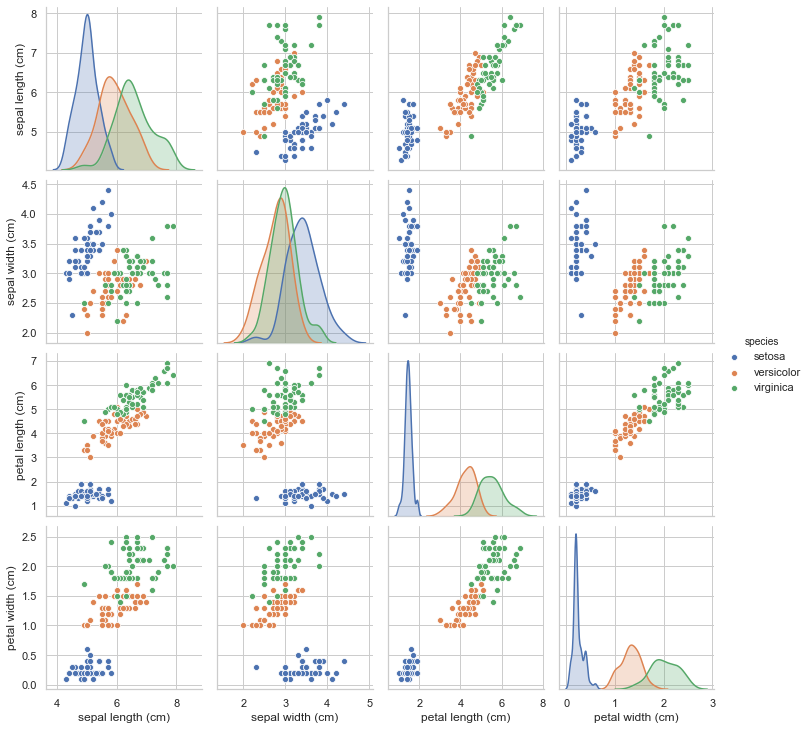

In [33]:
sns.pairplot(df, hue = 'species')
plt.show()
%matplotlib inline

In [2]:
X = iris.data # data
y = iris.target # classification target

# dfX = pd.DataFrame(X, columns = iris.feature_names)
# dfy = pd.DataFrame(y, columns = ['species'])

# classification : verginica , versicolor

In [ ]:

# df = pd.concat([dfX, dfy], axis = 1)
df = df[df.species.isin([1, 2])]
# df["species"] -=1
df = df.rename(columns = {"sepal length (cm)": "sepal_length",
                         "sepal width (cm)": "sepal_width"
                         "petal length (cm)":" petal_length",
                        "petal width (cm)":"petal_width"})


In [ ]:
# df = pd.concat([dfX, dfy], axis = 1)
df = df[df.species.isin([1, 2])]
# df["species"] -=1
df = df.rename(columns = {"sepal length (cm)": "sepal_length",
                         "sepal width (cm)": "sepal_width"
                         "petal length (cm)":" petal_length",
                        "petal width (cm)":"petal_width"})


In [37]:
y_pred = result.predict(df) >= 0.5
plt.plot(y_pred)

NameError: name 'result' is not defined

In [40]:
from sklearn.matrics import confusion_matrix, classification_report

confusion_matrix(df.species, y_pred)

ModuleNotFoundError: No module named 'sklearn.matrics'

In [41]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

NameError: name 'y_pred' is not defined

In [ ]:
from sklern.metrics import roc_curve

fpr, tpr, thresh = roc_curve( df.species, result.predict(df.sepal_lenth))
plt.plot(fpr, tpr)
plt.show()
%matplotlib linlne

In [ ]:
from sklearn.metrics import auc
auc(fpr, tpr)

# Naive Bayes 

In [23]:
iris = load_iris()
X1 = iris.data
y1 = iris.target
dfX = pd.DataFrame(X, columns = iris.feature_names)
dfy = pd.DataFrame(y, columns = ['species'])

In [24]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB().fit (X, y)

In [25]:
# 속성
model1.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [26]:
# 속성평균
# 세토사, 베르시칼라, 버지니카 순으로 
model1.theta_

array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]])

In [27]:
# 분산
model1.sigma_

array([[0.121764, 0.140816, 0.029556, 0.010884],
       [0.261104, 0.0965  , 0.2164  , 0.038324],
       [0.396256, 0.101924, 0.298496, 0.073924]])

In [28]:
# 분류보고서, 결과표
y1_pred = model1.predict(X1)

from sklearn.metrics import confusion_matrix
confusion_matrix(y1, y1_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]])

In [ ]:
# 분류결과표



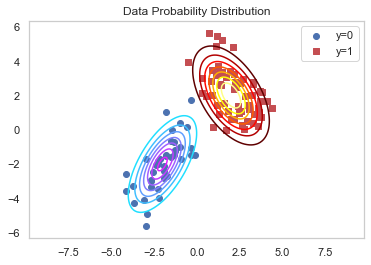

In [29]:
np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], marker="o", c='b', label="y=0")
plt.scatter(X1[:, 0], X1[:, 1], marker="s", c='r', label="y=1")
plt.legend()
plt.title("Data Probability Distribution")
plt.axis("equal")
plt.show()
%matplotlib inline

# 연습문제 2

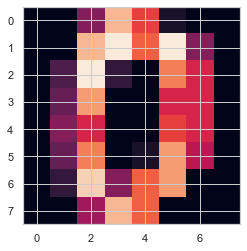

In [39]:
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target

plt.imshow(X2[0, :].reshape((8,8)))
plt.grid('off')

In [35]:
from sklearn.preprocessing import Binarizer

X2 = Binarizer(7).fit_transform(X2)


from sklearn.metrics import classification_report
y2_pred = model.predict(X2)

print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       178
           1       0.80      0.80      0.80       182
           2       0.91      0.90      0.91       177
           3       0.93      0.85      0.89       183
           4       0.96      0.94      0.95       181
           5       0.92      0.88      0.90       182
           6       0.97      0.96      0.97       181
           7       0.91      0.99      0.95       179
           8       0.80      0.82      0.81       174
           9       0.80      0.87      0.83       180

    accuracy                           0.90      1797
   macro avg       0.90      0.90      0.90      1797
weighted avg       0.90      0.90      0.90      1797



In [34]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB().fit(X2, y2)# 바이너라이즈 인수로도 할 수 있다.

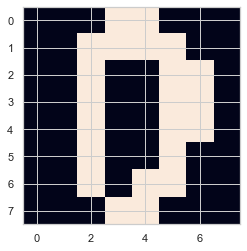

In [36]:
X2[0, :].reshape((8,8))

plt.imshow(X2[0, :].reshape((8,8)))

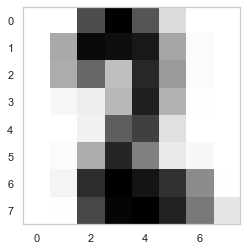

In [44]:
a= np.exp(model.feature_log_prob_)[2].reshape((8,8))# 2이미지의 평균
plt.imshow(a, cmap = plt.cm.binary)
plt.grid()

# 연습문제 3

In [47]:
# 이미지 분류에서도 가우시안 나이브베이즈를 쓸수 있다.
from sklearn.datasets import load_digits

digits = load_digits()
X2 = digits.data
y2 = digits.target

from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(X2, y2)
y2_pred = model.predict(X2)

In [48]:
from sklearn.metrics import classification_report


print(classification_report(y2, y2_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       178
           1       0.83      0.85      0.84       182
           2       0.98      0.64      0.77       177
           3       0.94      0.79      0.86       183
           4       0.98      0.84      0.90       181
           5       0.91      0.93      0.92       182
           6       0.96      0.99      0.98       181
           7       0.72      0.99      0.83       179
           8       0.58      0.86      0.69       174
           9       0.94      0.71      0.81       180

    accuracy                           0.86      1797
   macro avg       0.88      0.86      0.86      1797
weighted avg       0.89      0.86      0.86      1797



# 연습문제 4

In [52]:
X4 = np.array([
    [3, 4, 1, 2],
    [3, 5, 1, 1],
    [3, 3, 0, 4],
    [3, 4, 1, 2],
    [1, 2, 1, 4],
    [0, 0, 5, 3],
    [1, 2, 4, 1],
    [1, 1, 4, 2],
    [0, 1, 2, 5],
    [2, 1, 2, 3]])
y4 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X4, y4)
y4_pred = model_mult.predict(X4)


from sklearn.metrics import classification_report


print(classification_report(y4, y4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [52]:
X4 = np.array([
    [3.1, 4.0, 1.0, 2],
    [3.1, 5.0, 1.0, 1],
    [3.0, 3.0, 0.0, 4],
    [3.0, 4.0, 1.0, 2],
    [1.0, 2.0, 1.0, 4],
    [0.0, 0.0, 5.0, 3],
    [1.0, 2.0, 4.0, 1],
    [1.0, 1.0, 4.0, 2.0],
    [0.0, 1.0, 2.0, 5.0],
    [2.0, 1.0, 2.0, 3.0]])
y4 = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X4, y4)
y4_pred = model_mult.predict(X4)


from sklearn.metrics import classification_report


print(classification_report(y4, y4_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



# 연습문제 5

##### 각각 모델에 likelihood 를 구하는 방법을 찾아서 
1. 핸드폰 사진참조

In [69]:
# 2. 
from sklearn.datasets import fetch_covtype

covtpye = fetch_covtype()
X = covtpye.data
y = covtpye.target
X1 = X[:, :10]
X2 = X[:, 10:]
X1[0], X2[0]

(array([2.596e+03, 5.100e+01, 3.000e+00, 2.580e+02, 0.000e+00, 5.100e+02,
        2.210e+02, 2.320e+02, 1.480e+02, 6.279e+03]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [76]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

model1 = GaussianNB().fit(X1, y)
model2 = BernoulliNB().fit(X2, y)

prob1 = model1.predict_proba(X1)
prob2 = model2.predict_proba(X2)

likel1 = prob1 / model1.class_prior_
likel2 = prob2 / model1.class_prior_

prob = likel1 * likel2 * model1.class_prior_
# prob /= np.repeat(prob.sum(axis = 1)[:, np.newaxis], 7, axis = 1)
y_pred = np.argmax(prob, axis = 1) + 1 # 찾은값 1~7 과 argmax 0~ 6 을 매칭하기 위해 + 1을 해줌 

In [77]:
confusion_matrix(y, y_pred)

array([[140348,  53648,    157,      0,   2071,    881,  14735],
       [ 65031, 188638,   5849,     19,  12541,   7752,   3471],
       [     0,   2307,  23675,   3094,   1319,   5359,      0],
       [     0,      0,    551,   1941,      0,    255,      0],
       [   245,   5134,    275,      0,   3513,    326,      0],
       [     0,   1910,   6230,    621,    464,   8142,      0],
       [  6371,    183,      0,      0,     22,      0,  13934]])

In [78]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.66      0.66      0.66    211840
           2       0.75      0.67      0.71    283301
           3       0.64      0.66      0.65     35754
           4       0.34      0.71      0.46      2747
           5       0.18      0.37      0.24      9493
           6       0.36      0.47      0.41     17367
           7       0.43      0.68      0.53     20510

    accuracy                           0.65    581012
   macro avg       0.48      0.60      0.52    581012
weighted avg       0.68      0.65      0.66    581012



In [80]:
# 가우시안 하나로 하는것보다 부분별로 하는것이 낫다
model = GaussianNB().fit(X, y)
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.78      0.61    211840
           2       0.84      0.16      0.27    283301
           3       0.45      0.81      0.58     35754
           4       0.22      0.84      0.35      2747
           5       0.08      0.63      0.15      9493
           6       0.38      0.09      0.14     17367
           7       0.38      0.81      0.51     20510

    accuracy                           0.46    581012
   macro avg       0.41      0.59      0.37    581012
weighted avg       0.65      0.46      0.42    581012



# decision Tree

# 연습문제 1

In [86]:
from sklearn.datasets import load_iris

iris = load_iris()
X1= iris.data
y1 = iris.target

X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1) # max_depth 는 높일수록 트레이닝 퍼포는 올라간다!

y1_pred = model1.predict(X1)


from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.78      0.61    211840
           2       0.84      0.16      0.27    283301
           3       0.45      0.81      0.58     35754
           4       0.22      0.84      0.35      2747
           5       0.08      0.63      0.15      9493
           6       0.38      0.09      0.14     17367
           7       0.38      0.81      0.51     20510

    accuracy                           0.46    581012
   macro avg       0.41      0.59      0.37    581012
weighted avg       0.65      0.46      0.42    581012



In [95]:
from sklearn.datasets import load_iris

iris = load_iris()
X1= iris.data
y1 = iris.target

X1 = X1[:, :2]

from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(max_depth=3).fit(X1, y1) # max_depth 는 높일수록 트레이닝 퍼포는 올라간다!

y1_pred = model1.predict(X1)

from sklearn.metrics import accuracy_score
accuracy_score(y1, y1_pred)

from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.78      0.61    211840
           2       0.84      0.16      0.27    283301
           3       0.45      0.81      0.58     35754
           4       0.22      0.84      0.35      2747
           5       0.08      0.63      0.15      9493
           6       0.38      0.09      0.14     17367
           7       0.38      0.81      0.51     20510

    accuracy                           0.46    581012
   macro avg       0.41      0.59      0.37    581012
weighted avg       0.65      0.46      0.42    581012



In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bcancer = load_breast_cancer()
X2 = bcancer.data
y2 = bcancer.target


# seed model choice
# model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model1 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model1, X2, y2, scoring="accuracy", cv=5).mean()

0.9508150908244062

In [96]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X1, y1, scoring = "accuracy", cv=5).mean()

0.7933333333333332

In [97]:
mean_accuracy = []
train_accuracy = []
for max_depth in np.arange(3, 10):
    model1 = DecisionTreeClassifier(max_depth=max_depth).fit(X1, y1)
    train_accuracy.append(accuracy_score(y1, model1.pridict(X1)))
    mean_test_accuracy.appand(cross_val_score(model, X1, y1, scoring = "accuracy", cv=5).mean())
    
plt.plot(np.arange(3, 10), mean_test_accuracy)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'pridict'

# 연습문제 2

In [100]:
from sklearn.datasets import load_breast_cancer

bcancer = load_breast_cancer()
X2 = bcancer.data
y2 = bcancer.target

from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier().fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model2, X2, y2, scoring='accuracy', cv=5).mean()

0.9191274646793977

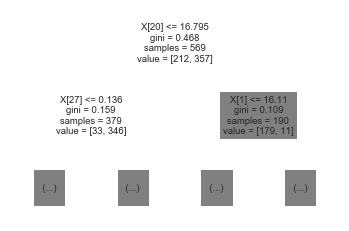

In [104]:
from sklearn.tree import plot_tree

plot_tree(model2, max_depth = 1)
plt.show()
%matplotlib inline

In [114]:
from sklearn.datasets import load_digit # 데이터 로드 

digit = load_digit()
X3 = digit.data
y3 = digit.target

from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier().fit(X3, y3)

from sklearn.model_selection import cross_val_score

cross_val_score(model3, X3, y3, scoring='accuracy', cv=5).mean()

ImportError: cannot import name 'load_digit' from 'sklearn.datasets' (/Users/jhkim/opt/miniconda3/lib/python3.7/site-packages/sklearn/datasets/__init__.py)

# 모형 결합 

In [109]:
# 연습문제 1번 스킵

# 연습문제 2. 

In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bcancer = load_breast_cancer()
X2 = bcancer.data
y2 = bcancer.target


# seed model choice
# model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model1 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model1, X2, y2, scoring="accuracy", cv=5).mean()

0.9508150908244062

In [112]:
# 시드 모형 성능비교 뎁스2
cross_val_score(DecisionTreeClassifier(max_depth=2), X2, y2, scoring="accuracy", cv=5).mean()

0.9279614966620089

In [113]:
# 시드 모형 성능비교 뎁스1
cross_val_score(DecisionTreeClassifier(max_depth=1), X2, y2, scoring="accuracy", cv=5).mean()

0.8998447446048751

# Extreme random forest

In [111]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bcancer = load_breast_cancer()
X2 = bcancer.data
y2 = bcancer.target


# seed model choice
# model1 = DecisionTreeClassifier(max_depth=10, random_state=0).fit(X, y)
model1 = BaggingClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100, random_state=0).fit(X2, y2)

from sklearn.model_selection import cross_val_score

cross_val_score(model1, X2, y2, scoring="accuracy", cv=5).mean()

0.9508150908244062

# suport vector m.

In [ ]:
# 연습문제 1

In [121]:
from sklearn.datasets import load_iris

iris = load_iris()
X1= iris.data[:100, :2]
y1 = iris.target[:100]

from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X1, y1)

from sklearn.metrics import classification_report
print(classification_report(y1, model1.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# 연습문제 2

In [125]:

X2= iris.data[:50, 2:]
y2 = iris.target[:50] - 1


model2 = SVC(kernel="linear", C=1e10).fit(X2, y2)


from sklearn.metrics import classification_report
print(classification_report(y2, model2.predict(X2)))

ValueError: The number of classes has to be greater than one; got 1 class